In this notebook we compute the differential cross section from the different approaches (nlo, div and css) for a particular choice of mass and longitudinal fraction. 

In [1]:
from dpp import setup as SETUP
from dpp import collider

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
mpl.rcParams['font.family'] = 'monospace'

In [2]:
setup = SETUP.Setup(400, 3)

In [3]:
M = 2
z = 0.5
sample_size = 80
methods = ['css', 'nlo', 'div']
kTmin, kTmax = 0, 10
parametrization = 'SY'

In [6]:
df = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                    kTmin=kTmin, kTmax=kTmax, parametrization=parametrization,\
                                                    scale='linear', pool_number=4)

**Plot of the dcs**

<IPython.core.display.Javascript object>


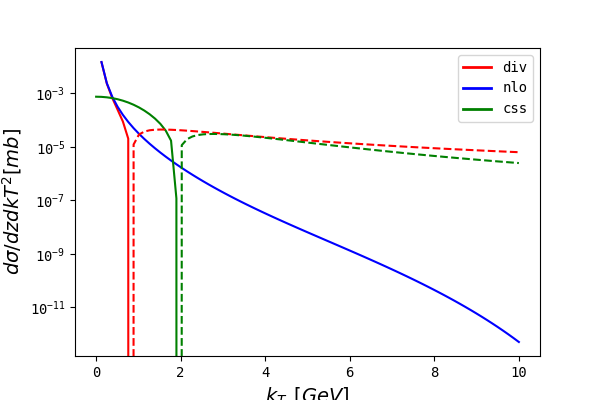

In [7]:
%matplotlib notebook

legends = [Line2D([0], [0], color='r', lw=2, label='div'),
           Line2D([0], [0], color='b', lw=2, label='nlo'),
           Line2D([0], [0], color='g', lw=2, label='css')]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df['kT'], df['div'], color='r', Linestyle='-')
ax.plot(df['kT'], df['nlo'], color='b', Linestyle='-')
ax.plot(df['kT'], df['css'], color='g', Linestyle='-')
ax.plot(df['kT'], -df['div'], color='r', Linestyle='--')
ax.plot(df['kT'], -df['nlo'], color='b', Linestyle='--')
ax.plot(df['kT'], -df['css'], color='g', Linestyle='--')

ax.set(xscale='linear', yscale='log')
ax.set_xlabel('$k_T\:\:[GeV]$', fontsize=14)
ax.set_ylabel('$d\sigma/dzdkT^2 [mb]$', fontsize=14)
ax.legend(handles=legends, loc='upper right')

plt.show()

The expected behaviours occur up to small deviations. Namely:
(1) at small $k_T$, $d\sigma_{div}$ and $d\sigma_{nlo}$ seems to converge. 
(2) at large $k_T$, $d\sigma_{div}$ and $d\sigma_{css}$ seems to converge. 

However in both limits the convergence is not exact and consequently the resulting 'regulated' differential cross section $d\sigma_{reg} = d\sigma_{css}+d\sigma_{nlo}-d\sigma_{div}$ is not the smooth function expected.

**Investigation on the non-exact convergence at small $k_T$**

In [8]:
M = 2
ztab = [0.1, 0.5, 0.9]
sample_size = 40
methods = ['nlo', 'div']
kTmin, kTmax = 1e-4, 2
parametrization = 'SY'

In [9]:
dftab = []
errtab = []
for z in ztab:
    df = collider.transverse_differential_cross_section(setup, M, z, sample_size, methods,\
                                                        kTmin=kTmin, kTmax=kTmax, parametrization=parametrization,\
                                                        scale='log', pool_number=4)
    err = np.abs((df['nlo']-df['div'])/(df['nlo']+df['div']))
    dftab.append(df)
    errtab.append(err)    

<IPython.core.display.Javascript object>


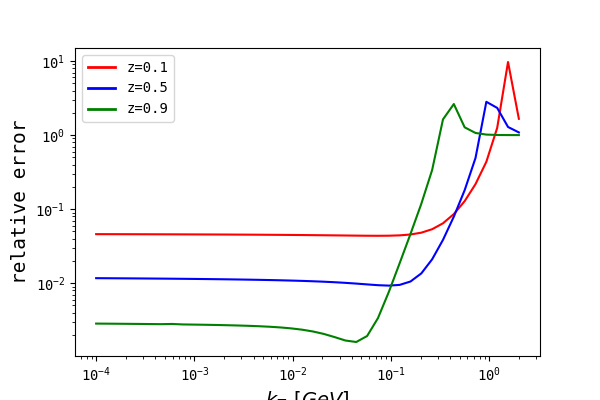

In [10]:
%matplotlib notebook

colors = ['r', 'b', 'g']
legends = [Line2D([0], [0], color=colors[i], lw=2, label='z={}'.format(ztab[i])) for i in range(3)]

fig, ax = plt.subplots(figsize=(6, 4))

for i in range(3):
    ax.plot(dftab[i]['kT'], errtab[i], color=colors[i])

ax.set(xscale='log', yscale='log')
ax.set_xlabel('$k_T\:\:[GeV]$', fontsize=14)
ax.set_ylabel('relative error', fontsize=14)
ax.legend(handles=legends, loc='upper left')

plt.show()

If we assume an exact power law behaviour, the flatness of the error function at $c\approx 10^{-2}$  implies that $d\sigma_{div} = c_1 k_T^a$ and $d\sigma_{NLO} = c_2 k_T^a$ with $c_1/c_2 = (1+c)/(1-c)$.
However we know that some logarithm spoil the power law and probably that the non-exact convergence is related to the fact that the divergent terms ($\log k_T$) are not accounted for in $d\sigma_{div}$. In the paper *Nucl. Phys.,
B250:199–224, 1985*, it is suggested to set a minimal transverse momentum (below which perturbative QCD is spoiled) at $k_T^{min} \approx 0.3$ [GeV]. However, this will not save the day since at $k_T=k_T^{min}$ the relative error is of order $10^{-1}$. So far I'm still a bit confused...

**Investigation on the non-exact convergence at large $k_T$**

Here we would like a perfect cancelation of $d\sigma_{css}-d\sigma_{div}$ so that the $d\sigma_{reg} \to d\sigma_{nlo}$. It is not the case and the cause might be related to a bad choice of the non-perturbative coefficients of the CSS formula. A further numerical investigation is required. TODO

In [8]:
(1+0.03)/(1-0.03)

1.0618556701030928

In [1]:
import pandas as pd

In [3]:
df = pd.DataFrame([[1,2],[5,6]])
df.to_pickle('/home/jonas/Documents/test.pkl', protocol=2)